# Resampling

1. 데이터를 축소시키고 싶은 Hz 만큼 축소시킨다. (desired_sampling_rate)

2. 축소된 신호 데이터를 보간할 방법을 고른다. (method='interpolation')

In [1]:
import gzip
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with gzip.open('/root/Workspace/DataWarehouse/stMary_RRpo/20_230531_sliced125_filt_stmary_test_patients.pickle.gzip', 'rb') as f:
    patient = pickle.load(f)

print(len(patient))

1284


In [3]:
def interpolation(x, input):
    x0 = int(np.floor(x))
    y0 = input[x0]
    x1 = int(np.ceil(x))
    y1 = input[x1]
    y = (y1-y0)*(x-x0) + y0
    return y


def signal_resample(input_signal, org_fs, new_fs, method='interpolation'):
    output_signal = []
    new_x = np.arange(0, len(input_signal), org_fs/new_fs)
    
    if method == 'interpolation': 
        interp = interpolation

    for x in new_x:
        y = interp(x, input_signal)
        output_signal.append(y)

    return np.asarray(output_signal)

In [4]:
# Sample Test
# test = patient[0][0]

# resampled_sig = signal_resample(test, 125, 30)
# resampled_sig.shape

# fig, axs = plt.subplots(2,1,figsize=(20,10))
# axs[0].plot(test, linestyle='--', marker='o', markersize=3, color='r', label='125Hz')
# axs[0].legend()
# axs[1].plot(resampled_sig, linestyle='--', marker='o', markersize=3, color='b', label='30Hz')
# axs[1].legend()
# plt.show()

## Application

In [4]:
import multiprocessing
from itertools import starmap

In [5]:
pool = multiprocessing.Pool(processes=40)
result = pool.starmap(signal_resample, [(pleth[0], 125, 30) for pleth in patient])
pool.close()
pool.join()

In [6]:
new_patient = []
for i in range(len(patient)):
    temp = []
    temp.append(result[i])
    temp.append(patient[i][1])
    new_patient.append(temp)

In [7]:
patient[1]

[array([-553.12842547, -573.25423752, -590.64189333, ...,  676.09475631,
         684.61208243,  691.75556809]),
 25]

In [8]:
new_patient[1]

[array([-553.12842547, -618.79806984, -655.66222111, ...,  514.23703492,
         635.85179065,  666.43392433]),
 25]

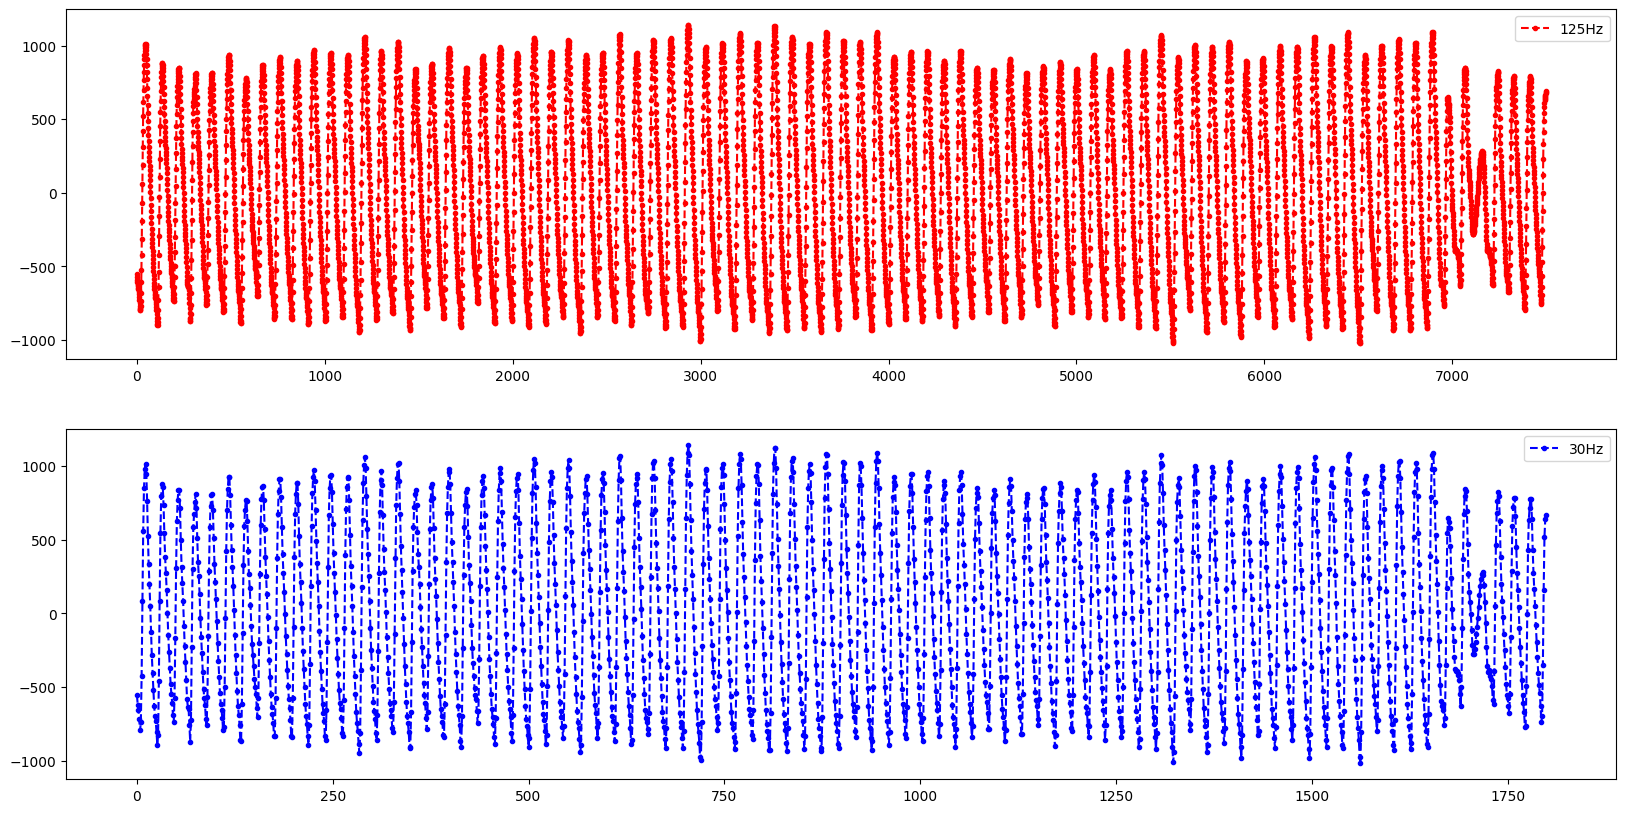

In [9]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot(patient[1][0], linestyle='--', marker='o', markersize=3, color='r', label='125Hz')
axs[0].legend()
axs[1].plot(new_patient[1][0], linestyle='--', marker='o', markersize=3, color='b', label='30Hz')
axs[1].legend()
plt.show()

In [11]:
import gzip
import pickle

In [ ]:
with gzip.open(f'../../DataWarehouse/stMary_RRpo/21_230531_resamp_sliced125_filt_stmary_test_patients.pickle.gzip', 'wb') as f:
    pickle.dump(new_patient, f)

## Compare 1 sample 2 diff fs with DTW

In [12]:
from scipy import stats # Paired t-test

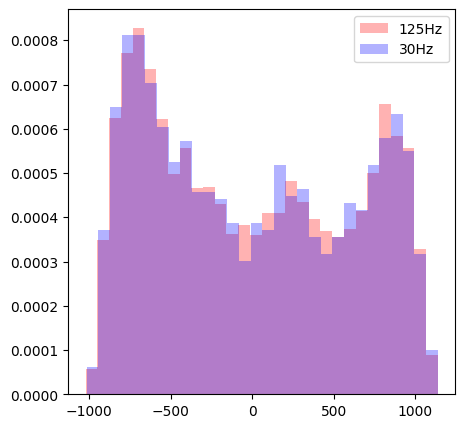

In [17]:
plt.figure(figsize=(5,5))
plt.hist(patient[1][0], bins=30, density=True, label='125Hz', color='r', alpha=.3)
plt.hist(new_patient[1][0], bins=30, density=True, label='30Hz', color='b', alpha=.3)
plt.legend()
plt.show()

In [19]:
stats.ttest_rel(patient[1][0].reshape(-1), new_patient[1][0].reshape(-1))

ValueError: unequal length arrays